In [1]:
import os
import re
from nltk import sent_tokenize, word_tokenize
from tdmh import *
import pandas as pd

## Collect all the titles

Firstly, we collect all the titles of the files in the corpus.

In [2]:
dir = 'Corpus'
corpus = []

for file in os.listdir(dir):
    if not(re.search(r'^\.' , file)): 
        path = os.path.join(dir,file)
        corpus.append(path)

## Create metadata for the texts

The cell below lets you create values for a categorical variable which can be used in visualisations. 

In [23]:
metadata = dict()

for text in corpus:
    value = int(input(f'Century of {text}:'))
    metadata[text] = value

Century of Corpus/Ulysses.txt:20
Century of Corpus/ThroughtheLookingGlass.txt:19
Century of Corpus/HeartofDarkness.txt:20
Century of Corpus/ARoomWithaView.txt:20
Century of Corpus/ATaleofTwoCities.txt:19
Century of Corpus/PrideandPrejudice.txt:19


In [26]:
print("metadata = {" , end = ' ')
for i,text in enumerate(metadata):
    print(f'"{text}":{metadata[text]}',end='')
    if i < len(metadata)-1:
        print(',')
print(" }")

metadata = { "Corpus/Ulysses.txt":20,
"Corpus/ThroughtheLookingGlass.txt":19,
"Corpus/HeartofDarkness.txt":20,
"Corpus/ARoomWithaView.txt":20,
"Corpus/ATaleofTwoCities.txt":19,
"Corpus/PrideandPrejudice.txt":19 }


Using the output of the cell above, you can also create a dictionary capturing all the values you assigned. Once this dictionary has been defined, you can remove the two code cells above. You don't longer need to assign the categories manually. 

In [27]:
metadata = { "Corpus/Ulysses.txt":20,
"Corpus/ThroughtheLookingGlass.txt":19,
"Corpus/HeartofDarkness.txt":20,
"Corpus/ARoomWithaView.txt":20,
"Corpus/ATaleofTwoCities.txt":19,
"Corpus/PrideandPrejudice.txt":19 }

The cell below also writes the metadata to a CSV file. 

In [28]:
csv = open('metadata.csv', 'w',encoding='utf-8')
csv.write('text,class\n')
for key in metadata:
    csv.write(f"{key},{metadata[key]}\n")
csv.close()

We also create a function to extract the title from the file name.

In [21]:
def get_title(path):
    title = os.path.basename(path)
    if re.search( r'txt$' , title ):
        # Remove txt extension
        title = title[ :title.index('.txt') ]
        # remove commas and dots
        title = re.sub( r'[.,]' , '' , title )
    return title

## Collect data about the texts 

Running the cell below may take some time.

In [29]:
out = open( 'data.csv' , 'w' , encoding = 'utf-8' )

pos_tags = ['JJ','JJR','JJS','VBD','MD','RB','RBR','RBS']

## Header of the CSV file
out.write('title,class,tokens,sentences,ttr')

for t in pos_tags:
    out.write(f',{t}')
out.write('\n')

for text in corpus:
    
    data = dict()
    print( f'Analysing {text} ...')
    
    ## Get the title, based on the filename
    title = get_title( text )
    
    ## read the full text
    fh = open( text, encoding = 'utf-8')
    full_text = fh.read()
    
    ## count the number of sentences
    sentences = sent_tokenize(full_text)
    data['nr_sentences'] = len(sentences)
    
    # dictionary to count the POS tags
    freq_pos = dict()    
    
    # variables for the calculation of type-token ratio
    ttr_cap = 3000
    freq_ttr = dict()
 
    # token count is initalised at 0
    data['nr_tokens'] = 0

    for s in sentences:
        words = word_tokenize(s)
        words = remove_punctuation(words)
        
        tags = pos_tag(words)
        # Each tag consists of two values: 
        # [0]: the word and [1] the POS tag
        for word_tag in tags:
            word = word_tag[0]
            tag = word_tag[1]
            
            # count the tokens
            data['nr_tokens'] += 1
            
            # place tokens in dictionary freq_ttr
            # only if the word count is less than ttr_cap
            # The nr of items in the dictionary eventually equals the nr of types
            if data['nr_tokens'] <= ttr_cap:
                freq_ttr[ word ] = freq_ttr.get( word , 0 ) + 1
                
            ## Count frequencies of all the POS tags
            freq_pos[ tag ] = freq_pos.get( tag ,0) +1
            
    for t in pos_tags:
        data[t] = freq_pos.get(t,0)
                
    # Calculate TTR: number of items in freq_ttr dictyionary
    # divided by ttr_cap
    data['ttr'] = len( freq_ttr ) / ttr_cap
    
    # write the results to a CSV file    
    out.write( f"{title},{metadata[text]},{data['nr_tokens']},{data['nr_sentences']},{data['ttr']}" )
    for t in pos_tags:
        out.write( f",{data[t] }"  )
    out.write('\n')
    
out.close()
print('Done!')

Analysing Corpus/Ulysses.txt ...
Analysing Corpus/ThroughtheLookingGlass.txt ...
Analysing Corpus/HeartofDarkness.txt ...
Analysing Corpus/ARoomWithaView.txt ...
Analysing Corpus/ATaleofTwoCities.txt ...
Analysing Corpus/PrideandPrejudice.txt ...
Done!


## Read the data from the CSV

In [30]:
data = pd.read_csv('data.csv')

In [31]:
data.head()

,title,class,tokens,sentences,ttr,JJ,JJR,JJS,VBD,MD,RB,RBR,RBS
0,Ulysses,20,263978,23641,0.369000,17496,442,409,14024,1890,11419,282,114
1,ThroughtheLookingGlass,19,27522,2061,0.267000,1369,73,40,2438,481,1949,39,7
2,HeartofDarkness,20,36658,2430,0.355000,2596,76,68,3147,480,2150,51,11
3,ARoomWithaView,20,65019,5863,0.299000,3610,145,75,5132,1314,4161,124,47
4,ATaleofTwoCities,19,133372,7802,0.346333,8253,360,215,9060,1720,7291,197,50


## Visualisations

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Average sentence length

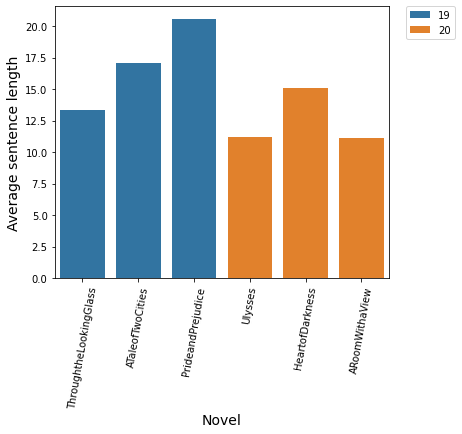

In [33]:
data = data.sort_values(by='class')

x_axis = data['title']
y_axis = data['tokens'] / data['sentences']


hue = data['class']

fig = plt.figure( figsize=( 6 , 5 ) )


graph = sns.barplot( x=x_axis, y=y_axis, hue=hue , dodge=False )

#graph.set_title('' , size = 20) 
graph.set_xlabel('Novel' , size = 14) 
graph.set_ylabel('Average sentence length' , size = 14 )

plt.xticks(rotation= 80)
# The next line places the legend outside out the plot
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);


plt.show()

### Type-token ratio

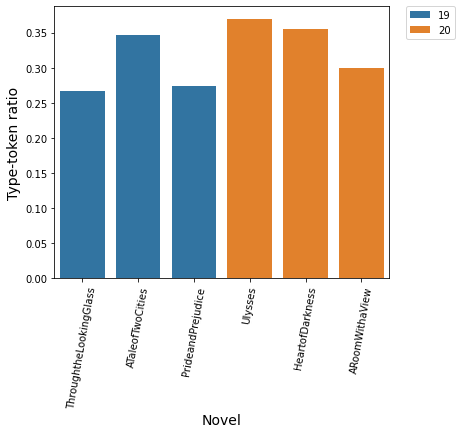

In [34]:
x_axis = data['title']
y_axis = data['ttr']
hue = data['class']

data = data.sort_values(by='class')

fig = plt.figure( figsize=( 6 , 5 ) )

#df_sorted = df.sort_values(by=[ y_axis] , ascending = False)

graph = sns.barplot( x=x_axis, y=y_axis, hue=hue , dodge=False )

#graph.set_title('' , size = 20) 
graph.set_xlabel('Novel' , size = 14) 
graph.set_ylabel('Type-token ratio' , size = 14 )

plt.xticks(rotation= 80)
# The next line places the legend outside out the plot
plt.legend( bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.);


plt.show()

### Modal verbs

Can you add code to do a comparative analysis of the use of modal verbs? The POS code for modal verbs is 'MD'

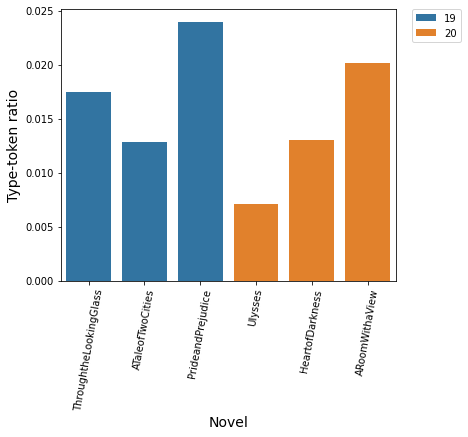

### Adjectives and Adverbs

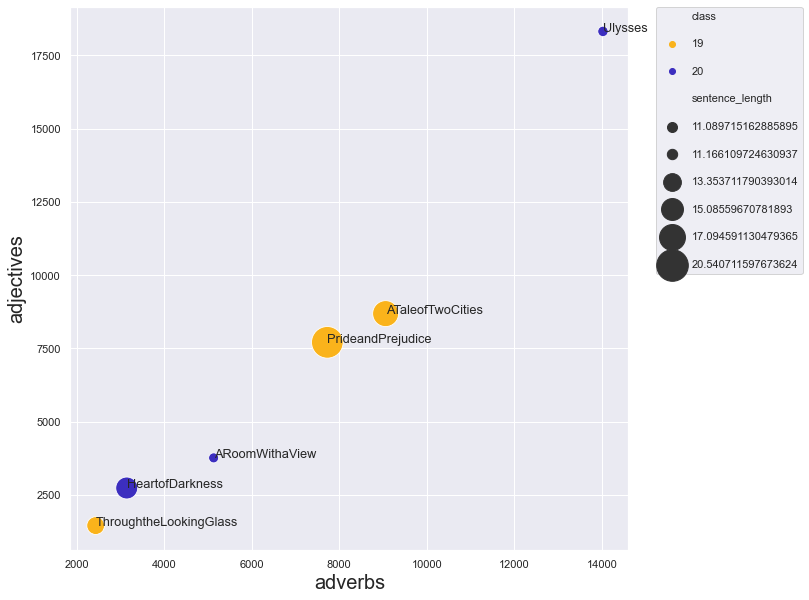

In [36]:
data['adjectives'] = data['JJ'] + data['JJS'] + data['JJS']
data['adverbs'] = data['RB'] + data['RBR'] + data['RBS'] 
data['adverbs'] = data['VBD'] 
data['sentence_length'] = data['tokens'] / data['sentences']

# Columns to use in the visualisation
y_axis = 'adjectives'
x_axis = 'adverbs'
point_size =  'sentence_length'
point_colour = 'class'

colours = [ '#fab31b' , '#3c2ebf'  ] 


fig = plt.figure( figsize = ( 10,10 ))

## This line adds spacing in between the lines of the legend 
sns.set(rc = {'legend.labelspacing': 1.6})

ax = sns.scatterplot( data=data , x=x_axis, y=y_axis,  
                     hue= point_colour, size= point_size, sizes=( 100 , 1000) , 
                      palette = colours  )

for index, row in data.iterrows():
    plt.text( row[x_axis], row[y_axis] , row['title'] , fontsize=12.8)


ax.set_xlabel( x_axis  , fontsize = 20 )
ax.set_ylabel( y_axis  , fontsize = 20 )
# ax.set_title( '' , fontsize=24 )


# # this next line places the legend outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# plt.savefig( 'scatterplot.png' , dpi=300 )

## Type-token ratio and average sentence length

Can you create a scatter plot which can be used to explore the values for the type-token ratio and average sentence length? Also provide suitable labels for the X-axis and the Y-axis

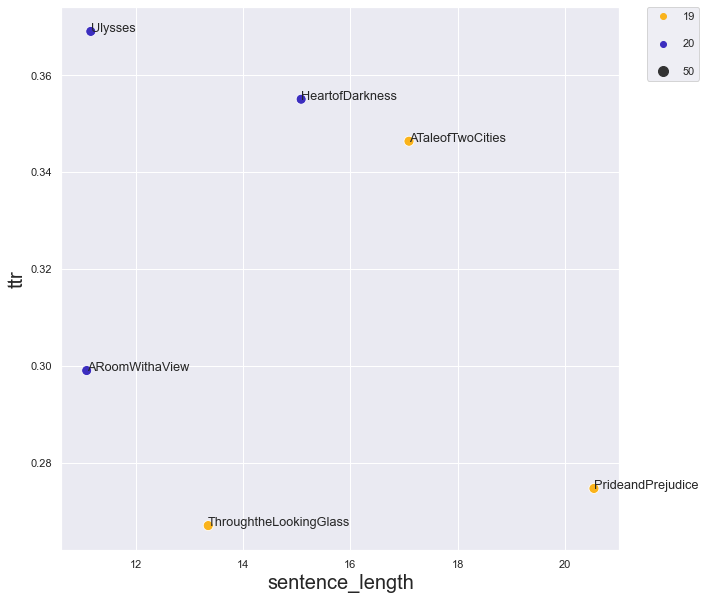